In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [23]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [24]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
alexnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 5, 5, 96)          11712     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 96)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 2, 256)         614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 384)         885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 384)        

In [26]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [27]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [28]:
train_y[0].shape

(10,)

In [29]:
hist=[]
results=[]

In [30]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [10,20,30]
for optimizer in  opt_list:
  for epoch in epochs_list:

    alexnet.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = alexnet.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(alexnet.evaluate(test_X, test_y, batch_size=128))

Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.5336 - accuracy: 0.8218 - val_loss: 0.1947 - val_accuracy: 0.9478
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1481 - accuracy: 0.9624 - val_loss: 0.1343 - val_accuracy: 0.9625
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0966 - accuracy: 0.9753 - val_loss: 0.1084 - val_accuracy: 0.9710
Epoch 4/10
750/750 [==============================] - 9s 13ms/step - loss: 0.0761 - accuracy: 0.9792 - val_loss: 0.0796 - val_accuracy: 0.9787
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0618 - accuracy: 0.9832 - val_loss: 0.1098 - val_accuracy: 0.9730
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0598 - accuracy: 0.9837 - val_loss: 0.0784 - val_accuracy: 0.9812
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0452 - accuracy: 0.9879 - val_loss: 0.0758 - val_accuracy: 0.981

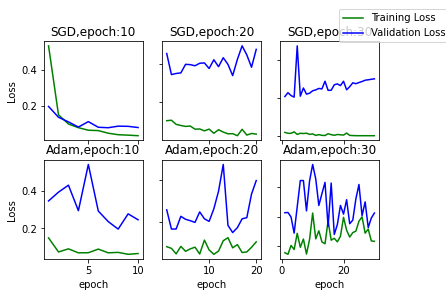

In [31]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)


axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:20')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

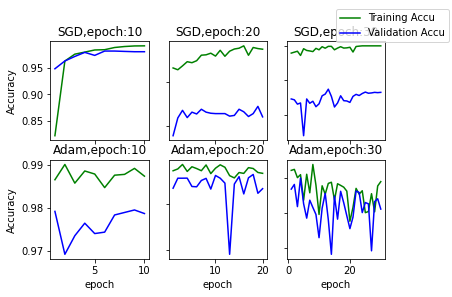

In [32]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)

axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:20' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [33]:
results

[[0.0674937516450882, 0.9807000160217285],
 [0.10862821340560913, 0.9828000068664551],
 [0.10627920925617218, 0.9868999719619751],
 [0.19659043848514557, 0.9783999919891357],
 [0.5190836191177368, 0.968500018119812],
 [0.1588457077741623, 0.9675999879837036]]